In [5]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install yfinance 
import yfinance as yf


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     -------------- ---------------------- 41.0/104.0 kB 487.6 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 997.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 4.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.1 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.1 MB 7.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.1 MB 7.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 7.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/8.1 MB 7.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 7.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/8.1 MB 7.6 MB/s eta 0:00:01
   -------------

Matplotlib is building the font cache; this may take a moment.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Define stock symbols
stocks = ["AARTIPHARM.NS", "BLUESTARCO.NS", "FEDERALBNK.NS", "ICIL.NS", "IEX.NS", 
    "ITC.NS", "MARKSANS.NS", "RAYMOND.NS", "NITINSPIN.NS", "RALLIS.NS", "BLS.NS",
    "APOLLO.NS", "WINDLAS.NS", "NATCOPHARM.NS", "PARADEEP.NS"]
# Define the time period
start = "2024-03-25"  # Adjust as needed
end = "2025-03-24"

In [10]:
# Download data
data = yf.download(stocks, start='2024-01-14', end='2025-01-15')['Close']

[*********************100%***********************]  15 of 15 completed


In [11]:
returns = data.pct_change().dropna()
returns.head(2)

Ticker,AARTIPHARM.NS,APOLLO.NS,BLS.NS,BLUESTARCO.NS,FEDERALBNK.NS,ICIL.NS,IEX.NS,ITC.NS,MARKSANS.NS,NATCOPHARM.NS,NITINSPIN.NS,PARADEEP.NS,RALLIS.NS,RAYMOND.NS,WINDLAS.NS
Date,,,,,,,,,,,,,,,
2024-01-16,-0.027237,-0.003243,-0.010979,-0.010496,-0.021249,-0.021262,0.002750,0.010051,-0.003421,-0.019623,-0.003020,-0.012763,0.018964,0.001335,-0.040645
2024-01-17,-0.012508,-0.009760,0.014844,0.010036,-0.025384,-0.015135,-0.102681,-0.012069,-0.039638,-0.016289,0.006664,-0.017453,-0.014774,-0.012547,0.032881


In [13]:
# Portfolio weights (random example)
weights = np.random.random(len(stocks))
weights /= np.sum(weights)

In [14]:
# Expected portfolio return
expected_return = np.dot(weights, returns.mean() * 252)  # Annualized return
expected_return 

np.float64(0.2960091897641275)

In [15]:
# Portfolio risk (standard deviation)
portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))  # Annualized risk
portfolio_risk

np.float64(0.23398519181284966)

In [16]:
# Number of portfolios
num_portfolios = 10000

In [17]:
# Store results
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Random weights
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    # Portfolio return
    portfolio_return = np.dot(weights, returns.mean() * 252)
    # Portfolio risk
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    # Sharpe Ratio (assuming risk-free rate = 0.69)
    sharpe_ratio = (portfolio_return-0.069) / portfolio_risk

    results[0, i] = portfolio_return
    results[1, i] = portfolio_risk
    results[2, i] = sharpe_ratio

In [18]:
# Find the portfolio with maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_risk = results[1, max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

print(f"Max Sharpe Ratio Portfolio Return: {max_sharpe_return:.2f}")
print(f"Max Sharpe Ratio Portfolio Risk: {max_sharpe_risk:.2f}")
print(f"Optimal Weights: {optimal_weights}")

Max Sharpe Ratio Portfolio Return: 0.45
Max Sharpe Ratio Portfolio Risk: 0.24
Optimal Weights: [0.07628442 0.00512951 0.01569253 0.1483921  0.04821821 0.08213487
 0.00176888 0.04976666 0.09677106 0.07485238 0.09865346 0.07700551
 0.01819228 0.0550266  0.15211154]


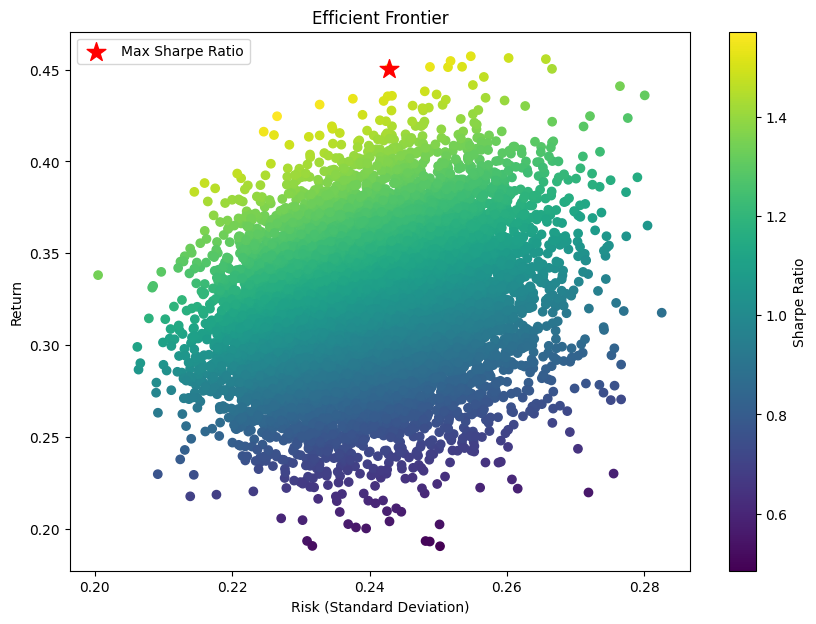

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_risk, max_sharpe_return, color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()

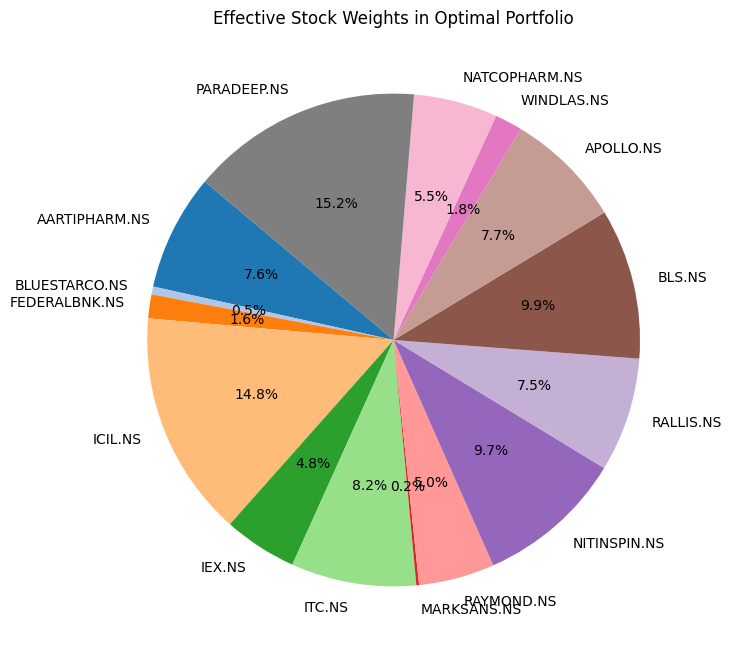

In [20]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(optimal_weights, labels=stocks, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Effective Stock Weights in Optimal Portfolio')
plt.show()